In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os

In [3]:
image=pd.read_table('FigS13A-B.csv',sep='\t')
image.head()

,Sample,Red,Green,Greenness,Area(cm2)
0,Col-0,143.5037,193.8903,1.351117,6.907313
1,Col-0,137.9075,186.2852,1.350798,7.047443
2,Col-0,135.5741,188.7380,1.392139,10.948287
3,Col-0,137.0784,185.9790,1.356735,9.647162
4,Col-0,137.0143,184.0630,1.343385,10.438724


In [4]:
photosynq=pd.read_table('FigS13C-D.csv',sep='\t')
photosynq.head()

,Sample,Phi2,RelativeChlorophyll
0,Col-0,0.706,27.222
1,Col-0,0.706,27.192
2,Col-0,0.693,25.931
3,Col-0,0.704,26.472
4,Col-0,0.700,28.872


In [5]:
ionome=pd.read_table('FigS13E-F.csv',sep='\t')
ionome.head()

,Sample,Replicate,Mn,Fe
0,Col-0,A1,135.159,78.480
1,Col-0,A2,118.592,66.467
2,Col-0,A3,127.521,66.879
3,S1-1,B1,197.375,107.968
4,S1-1,B2,202.285,90.337


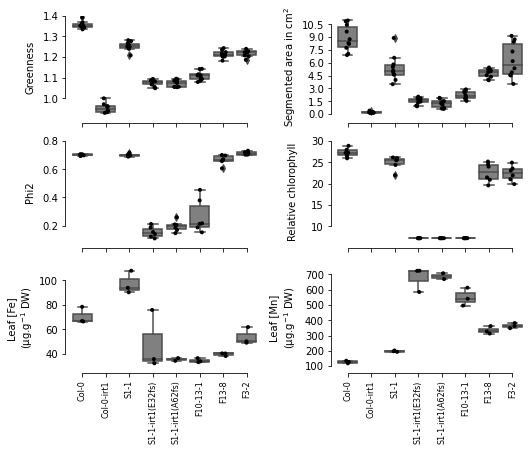

In [11]:
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
Order=['Col-0','Col-0-irt1','S1-1','S1-1-irt1(E32fs)','S1-1-irt1(A62fs)','F10-13-1','F13-8','F3-2']
cm=1/2.54
fig,axes = plt.subplots(3,2,sharey=False,figsize=(19*cm,16*cm))
def plot(dataframe,phenotype,title,idx1,idx2):
    sns.boxplot(x='Sample',
                y=phenotype,
                data=dataframe,
                color='grey',
                order=Order,
                ax=axes[idx1,idx2])
    sns.stripplot(x='Sample',
                y=phenotype,
                data=dataframe,
                color='0',
                order=Order,
                s=4,
                ax=axes[idx1,idx2])
    axes[idx1,idx2].set_xlabel('')
    axes[idx1,idx2].set_ylabel(title)
plot(image,'Greenness','Greenness',0,0) 
axes[0,0].set_ylim(ymax=1.4)
plot(image,'Area(cm2)','Segmented area in cm$^2$',0,1)
axes[0,1].yaxis.set_major_locator(ticker.MultipleLocator(1.5))
axes[0,0].set_xticklabels([])
axes[0,1].set_xticklabels([])
plot(photosynq,'Phi2','Phi2',1,0)
axes[1,0].set_ylim(ymax=0.8)
plot(photosynq,'RelativeChlorophyll','Relative chlorophyll',1,1)
axes[1,1].set_ylim(ymax=30)
axes[1,0].set_xticklabels([])
axes[1,1].set_xticklabels([])
plot(ionome,'Fe','Leaf [Fe] \n(µg.g$^{-1}$ DW)',2,0)
plot(ionome,'Mn','Leaf [Mn] \n(µg.g$^{-1}$ DW)',2,1)
axes[2,1].yaxis.set_major_locator(ticker.MultipleLocator(100))
sns.despine(trim=True,offset=5)

axes[2,0].set_xticklabels(['Col-0','Col-0-irt1','S1-1','S1-1-irt1(E32fs)','S1-1-irt1(A62fs)','F10-13-1','F13-8','F3-2'])
axes[2,1].set_xticklabels(['Col-0','Col-0-irt1','S1-1','S1-1-irt1(E32fs)','S1-1-irt1(A62fs)','F10-13-1','F13-8','F3-2'])
axes[2,0].tick_params(labelrotation=90,labelsize=8,axis='x')
axes[2,1].tick_params(labelrotation=90,labelsize=8,axis='x')
fig.align_ylabels(axes[:, ])
plt.tight_layout()
plt.savefig("FigS13.png", format="png",bbox_inches="tight",facecolor="w",dpi=600)